In [1]:
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting()

#### Generalized Coordinates, Speeds, Derivatives, and Dynamic Symbols

In [2]:
q1 = me.dynamicsymbols('theta_1')

In [3]:
u1 = me.dynamicsymbols('u1')

In [4]:
q1d = me.dynamicsymbols('theta_1', 1)
q1dd = me.dynamicsymbols('theta_1', 2)

In [5]:
t1 = me.dynamicsymbols('tau_1')

#### Constants

In [6]:
m1, I1, l1, g = sm.symbols('m_1, I_1, l_1, g')

#### Reference Frames

In [7]:
N = me.ReferenceFrame('N')
B1 = N.orientnew('B1', 'Axis', (q1, N.z))         # Base arm

#### Points

In [8]:
J1 = me.Point('N')

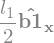

In [9]:
c1 = J1.locatenew('c_1', (l1/2)*B1.x)
c1.pos_from(J1)

#### Velocities

In [10]:
J1.set_vel(N, 0)

In [11]:
B1.set_ang_vel(N, u1*N.z)
B1.ang_vel_in(N)

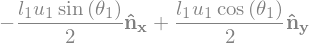

In [12]:
c1.v2pt_theory(J1, N, B1).express(N)

#### Kinematical DiffEqs

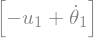

In [13]:
kdes = [q1d - u1]
kdes

#### Masses and Interia

In [14]:
I1 = (1/3)*m1*l1**2
IB1 = me.inertia(N, 0, I1, I1)
IB1

#### Loads

In [15]:
RB1 = -(m1*g)*N.y   # gravity
RB1

In [16]:
AT1 = t1*B1.z   # applied torque
AT1

#### Kane's Equations

In [17]:
link1 = me.RigidBody('base', c1, B1, m1, (IB1, J1))

In [18]:
bodies = [link1]

loads = [(c1, RB1),
         (B1, AT1)]

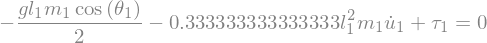

In [19]:
kane = me.KanesMethod(N, q_ind=[q1], u_ind=[u1], kd_eqs=kdes)
fr, frstar = kane.kanes_equations(bodies, loads=loads)

eom = sm.Eq((fr + frstar)[0], 0)
eom

In [20]:
f1 = sm.solve([eom], t1)
f1

#### Linearization

In [21]:
linearizer = kane.to_linearizer()

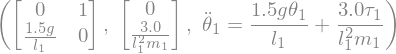

In [22]:
op_point = {q1:sm.pi/2, u1: 0} # vertical
A, B = linearizer.linearize(A_and_B=True, op_point = op_point)
gcs = [q1, q1d]
states = [q1d, q1dd]
state_eq1 = sm.Eq(states[0], gcs[0]*A[0] + gcs[1]*A[1] + t1*B[0])
state_eq2 = sm.Eq(states[1], gcs[0]*A[2] + gcs[1]*A[3] + t1*B[1])
f = sm.solve([state_eq2], t1)

A, B, state_eq2

#### Linearized Equation of Motion

In [23]:
f.get(t1)